In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

# Cargar el JSON
with open('driver61_videos.json', 'r') as f:
    videos = json.load(f)

print(f"Total de videos: {len(videos)}")
print(f"\nPrimer video como ejemplo:")
print(json.dumps(videos[0], indent=2))

Total de videos: 20

Primer video como ejemplo:
{
  "video_id": "y_RBtr7DL_U",
  "title": "Banned For Being Too Clever",
  "description": "\ud83d\udecf\ufe0f Head over to https://www.eightsleep.com/uk/driver61 and use the code DRIVER61 to get $350 off your Pod 5 Ultra. \n\n\ud83d\udca8 \ud83c\udfce\ufe0f  Join our Engineering Newsletter: http://bit.ly/4kofUR5\n\n\ud83c\udfce\ufe0f  Our handcrafted wallets made from Carlos Sainz' 2022 car are on sale now: https://sixtyone.store/pages/sainz-2022-wallet\n\n\ud83c\udfce\ufe0f Huge thank you to Racing Bulls and Fabiana for the incredible access!\n\n\ud83c\udfaf Considered a career in motorsport or F1? Take our assessment to see if you're and get a personalised report: https://driver61-education.scoreapp.com\n\n\ud83d\ude80 Search for the latest Motorsport Jobs with Fluid Jobs by Driver61: https://fluidjobs.com/youtube\n\n\ud83c\udfc6 Get trophi.ai, our iRacing AI coach, and take the 7-day challenge at https://get.trophi.ai/driver61/. Try fr

In [2]:
# Explorar estructura y keys
print("=== ESTRUCTURA DEL DATASET ===\n")
print("Keys disponibles en cada video:")
for key in videos[0].keys():
    sample_value = videos[0][key]
    value_type = type(sample_value).__name__
    
    if isinstance(sample_value, list):
        print(f"  - {key}: {value_type} (ej: {sample_value[:3] if len(sample_value) > 3 else sample_value})")
    elif isinstance(sample_value, str) and len(sample_value) > 100:
        print(f"  - {key}: {value_type} (texto largo)")
    else:
        print(f"  - {key}: {value_type} (ej: {sample_value})")

# Convertir a DataFrame para análisis más fácil
df = pd.DataFrame(videos)
print(f"\n=== INFO DEL DATAFRAME ===")
print(df.info())

=== ESTRUCTURA DEL DATASET ===

Keys disponibles en cada video:
  - video_id: str (ej: y_RBtr7DL_U)
  - title: str (ej: Banned For Being Too Clever)
  - description: str (texto largo)
  - published_at: str (ej: 2025-10-01T11:12:07Z)
  - channel_title: str (ej: Driver61)
  - duration_seconds: int (ej: 1060)
  - duration_formatted: str (ej: 0:17:40)
  - view_count: int (ej: 131767)
  - like_count: int (ej: 5806)
  - favorite_count: int (ej: 0)
  - comment_count: int (ej: 174)
  - tags: list (ej: ['Formula 1', 'Motorsport', 'Engineering'])
  - category_id: str (ej: 2)
  - default_language: str (ej: en-GB)
  - default_audio_language: str (ej: en-GB)
  - thumbnail_default: str (ej: https://i.ytimg.com/vi/y_RBtr7DL_U/default.jpg)
  - thumbnail_medium: str (ej: https://i.ytimg.com/vi/y_RBtr7DL_U/mqdefault.jpg)
  - thumbnail_high: str (ej: https://i.ytimg.com/vi/y_RBtr7DL_U/hqdefault.jpg)
  - thumbnail_standard: str (ej: https://i.ytimg.com/vi/y_RBtr7DL_U/sddefault.jpg)
  - thumbnail_maxres: s

=== DISTRIBUCIONES Y ESTADÍSTICAS ===

1. DURACIÓN DE VIDEOS:
count      20.00000
mean      924.05000
std       616.24572
min        64.00000
25%       699.75000
50%       815.00000
75%       986.00000
max      3310.00000
Name: duration_seconds, dtype: float64

Promedio: 15.4 minutos
Mediana: 13.6 minutos


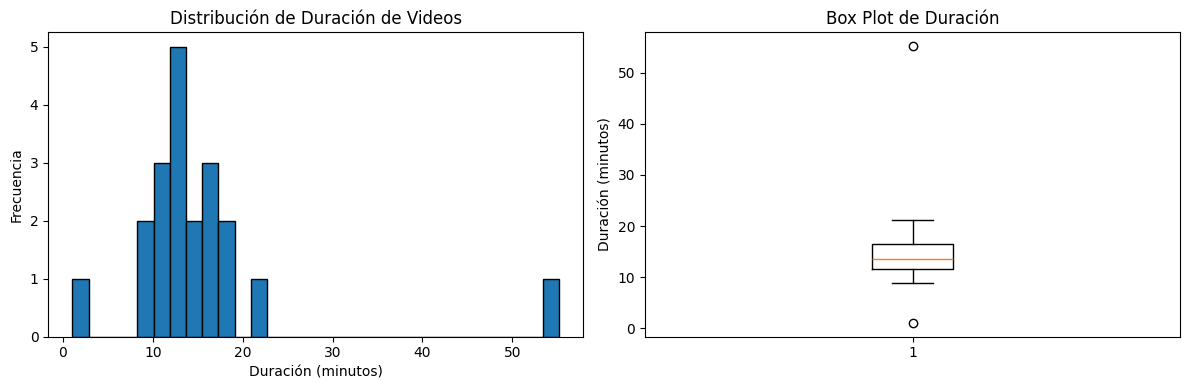


2. MÉTRICAS DE ENGAGEMENT:
         view_count    like_count  comment_count
count  2.000000e+01     20.000000      20.000000
mean   6.747697e+05  15579.050000     750.600000
std    4.885964e+05   8752.877659     610.624391
min    2.260500e+04    951.000000      38.000000
25%    2.932212e+05   8111.250000     356.500000
50%    6.735915e+05  15397.000000     523.500000
75%    1.005298e+06  20990.000000    1057.500000
max    1.819896e+06  35533.000000    2532.000000

Promedio Like Rate: 2.85%
Promedio Comment Rate: 0.13%


In [3]:
# Análisis de distribuciones
print("=== DISTRIBUCIONES Y ESTADÍSTICAS ===\n")

# Duración de videos
print("1. DURACIÓN DE VIDEOS:")
print(df['duration_seconds'].describe())
df['duration_minutes'] = df['duration_seconds'] / 60
print(f"\nPromedio: {df['duration_minutes'].mean():.1f} minutos")
print(f"Mediana: {df['duration_minutes'].median():.1f} minutos")

# Visualización de duración
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['duration_minutes'], bins=30, edgecolor='black')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Duración de Videos')

plt.subplot(1, 2, 2)
plt.boxplot(df['duration_minutes'])
plt.ylabel('Duración (minutos)')
plt.title('Box Plot de Duración')
plt.tight_layout()
plt.show()

# Engagement metrics
print("\n2. MÉTRICAS DE ENGAGEMENT:")
print(df[['view_count', 'like_count', 'comment_count']].describe())

# Ratio de engagement
df['like_rate'] = (df['like_count'] / df['view_count']) * 100
df['comment_rate'] = (df['comment_count'] / df['view_count']) * 100

print(f"\nPromedio Like Rate: {df['like_rate'].mean():.2f}%")
print(f"Promedio Comment Rate: {df['comment_rate'].mean():.2f}%")

=== ANÁLISIS DE TAGS/TEMAS ===

Total de tags únicos: 92

Top 20 tags más frecuentes:
  Formula 1: 20 videos
  Motorsport: 20 videos
  F1: 20 videos
  Incredible Motorsport: 20 videos
  Driver61: 20 videos
  Engineering: 19 videos
  Racing: 19 videos
  Scott Mansell: 19 videos
  Red Bull: 4 videos
  Aerodynamics: 4 videos
  Suspension: 3 videos
  McLaren: 3 videos
  Aero: 3 videos
  Racing Bulls: 2 videos
  Alpine: 2 videos
  Brembo: 2 videos
  Lawson: 2 videos
  Liam Lawson: 2 videos
  McLaren F1: 2 videos
  Grand Prix: 2 videos


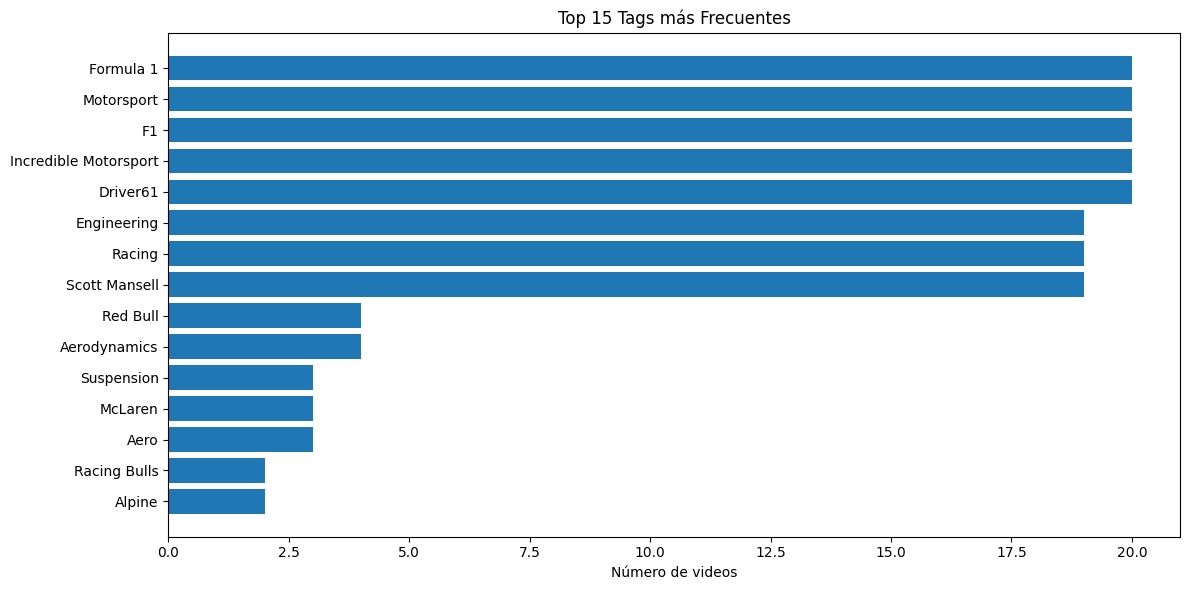

In [4]:
# Análisis de Tags (temas)
print("=== ANÁLISIS DE TAGS/TEMAS ===\n")

# Extraer todos los tags
all_tags = []
for video in videos:
    if video['tags']:
        all_tags.extend(video['tags'])

tag_counts = Counter(all_tags)
print(f"Total de tags únicos: {len(tag_counts)}")
print(f"\nTop 20 tags más frecuentes:")
for tag, count in tag_counts.most_common(20):
    print(f"  {tag}: {count} videos")

# Visualizar top tags
top_tags = tag_counts.most_common(15)
tags_names = [t[0] for t in top_tags]
tags_counts = [t[1] for t in top_tags]

plt.figure(figsize=(12, 6))
plt.barh(tags_names, tags_counts)
plt.xlabel('Número de videos')
plt.title('Top 15 Tags más Frecuentes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

=== ANÁLISIS TEMPORAL ===

1. DISTRIBUCIÓN POR AÑO:
year
2025    20
Name: count, dtype: int64


/var/folders/8q/6vxkc11x47nc20_t6wnbb3h00000gn/T/ipykernel_89366/2583338946.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['published_date'].dt.to_period('M')


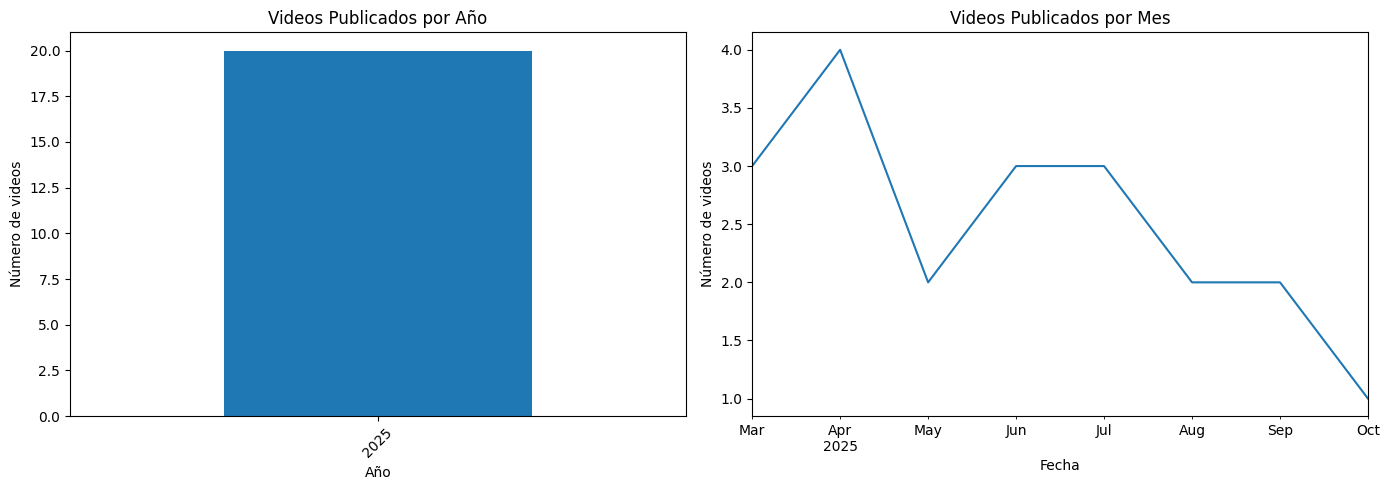


Rango de fechas: 2025-03-07 15:55:25+00:00 a 2025-10-01 11:12:07+00:00


In [5]:
# Análisis temporal
print("=== ANÁLISIS TEMPORAL ===\n")

# Convertir fechas
df['published_date'] = pd.to_datetime(df['published_at'])
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['year_month'] = df['published_date'].dt.to_period('M')

print("1. DISTRIBUCIÓN POR AÑO:")
videos_per_year = df['year'].value_counts().sort_index()
print(videos_per_year)

# Videos por mes
videos_per_month = df.groupby('year_month').size()

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
videos_per_year.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Número de videos')
plt.title('Videos Publicados por Año')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
videos_per_month.plot()
plt.xlabel('Fecha')
plt.ylabel('Número de videos')
plt.title('Videos Publicados por Mes')
plt.tight_layout()
plt.show()

print(f"\nRango de fechas: {df['published_date'].min()} a {df['published_date'].max()}")

In [6]:
# Análisis de títulos y descripciones para base de conocimiento
print("=== ANÁLISIS DE CONTENIDO PARA RECOMENDACIONES ===\n")

# Palabras clave en títulos
from collections import Counter
import re

def extract_keywords(text):
    """Extrae palabras clave del texto"""
    # Convertir a minúsculas y extraer palabras
    words = re.findall(r'\b[a-z]{3,}\b', text.lower())
    # Filtrar palabras comunes
    stop_words = {'the', 'and', 'for', 'with', 'this', 'that', 'from', 'have', 'are', 'was', 'were', 'been'}
    return [w for w in words if w not in stop_words]

# Análisis de títulos
all_title_words = []
for video in videos:
    all_title_words.extend(extract_keywords(video['title']))

title_keywords = Counter(all_title_words)
print("Top 30 palabras en títulos:")
for word, count in title_keywords.most_common(30):
    print(f"  {word}: {count}")

# Categorías principales identificadas
print("\n=== CATEGORÍAS TEMÁTICAS IDENTIFICADAS ===")
categories = {
    'Teams': ['ferrari', 'mercedes', 'mclaren', 'redbull', 'red', 'bull'],
    'Technical': ['engine', 'aero', 'suspension', 'gearbox', 'brakes', 'steering', 'wheel'],
    'Drivers': ['verstappen', 'hamilton', 'leclerc', 'norris', 'alonso', 'vettel'],
    'Racing': ['race', 'racing', 'qualifying', 'overtake', 'crash', 'fastest'],
    'Engineering': ['engineering', 'design', 'made', 'work', 'factory']
}

for category, keywords in categories.items():
    count = sum(1 for video in videos if any(kw in video['title'].lower() for kw in keywords))
    print(f"  {category}: {count} videos")

=== ANÁLISIS DE CONTENIDO PARA RECOMENDACIONES ===

Top 30 palabras en títulos:
  how: 7
  racing: 3
  genius: 3
  made: 3
  what: 2
  cars: 2
  formula: 2
  driving: 2
  mclaren: 2
  suspension: 2
  trick: 2
  drivers: 2
  race: 2
  driver: 2
  explains: 2
  world: 2
  banned: 1
  being: 1
  too: 1
  clever: 1
  happens: 1
  after: 1
  but: 1
  didn: 1
  work: 1
  makes: 1
  modern: 1
  look: 1
  stupid: 1
  like: 1

=== CATEGORÍAS TEMÁTICAS IDENTIFICADAS ===
  Teams: 5 videos
  Technical: 5 videos
  Drivers: 0 videos
  Racing: 6 videos
  Engineering: 4 videos


In [7]:
# Videos más populares
print("=== TOP 10 VIDEOS MÁS VISTOS ===\n")
top_viewed = df.nlargest(10, 'view_count')[['title', 'view_count', 'like_count', 'duration_minutes']]
for idx, row in top_viewed.iterrows():
    print(f"{row['title']}")
    print(f"  Views: {row['view_count']:,} | Likes: {row['like_count']:,} | Duración: {row['duration_minutes']:.1f} min\n")

print("\n=== TOP 10 VIDEOS CON MEJOR ENGAGEMENT (LIKE RATE) ===\n")
top_engagement = df.nlargest(10, 'like_rate')[['title', 'view_count', 'like_rate']]
for idx, row in top_engagement.iterrows():
    print(f"{row['title']}")
    print(f"  Views: {row['view_count']:,} | Like Rate: {row['like_rate']:.2f}%\n")

=== TOP 10 VIDEOS MÁS VISTOS ===

McLaren’s GENIUS Tyre Trick Explained
  Views: 1,819,896 | Likes: 35,533 | Duración: 8.9 min

So Genius It Makes Modern F1 Look STUPID!
  Views: 1,385,970 | Likes: 24,974 | Duración: 16.4 min

McLaren’s NO SUSPENSION Trick
  Views: 1,306,942 | Likes: 26,289 | Duración: 10.6 min

Race Driver Explains Lawson’s Driving Style Problem
  Views: 1,081,120 | Likes: 25,521 | Duración: 9.3 min

How £100,000 F1 Brakes Are Made (Factory Visit)
  Views: 1,071,938 | Likes: 23,726 | Duración: 14.2 min

F1 Engineer Explains Red Bull's Difficult Car
  Views: 983,085 | Likes: 18,760 | Duración: 11.1 min

How Formula 1 Cars Are Made
  Views: 840,866 | Likes: 15,395 | Duración: 55.2 min

What Happens to F1 Cars After Racing?
  Views: 759,273 | Likes: 20,078 | Duración: 15.8 min

How The World's Strongest F1 Helmet Is Made
  Views: 737,614 | Likes: 14,258 | Duración: 18.3 min

How F1 Teams ACTUALLY Spend $350M a Year (ft. Guenther Steiner)
  Views: 680,523 | Likes: 15,486 

# Resumen para Base de Conocimiento

## Objetivo
Crear un sistema de recomendación de videos basado en preguntas del usuario.

## Características Clave del Dataset

### 1. **Campos Disponibles** (26 campos por video)
- **Identificación**: video_id, url
- **Contenido**: title, description, tags
- **Metadata**: published_at, duration_seconds, channel_title
- **Engagement**: view_count, like_count, comment_count
- **Multimedia**: thumbnails (5 resoluciones)

### 2. **Temas Principales**
Basado en el análisis de tags y títulos:
- **Technical/Engineering**: Suspensión, aerodinámica, motores, frenos, dirección
- **Teams**: Ferrari, Mercedes, McLaren, Red Bull
- **Drivers**: Verstappen, Hamilton, Leclerc, etc.
- **Racing**: Carreras, calificaciones, adelantamientos
- **History**: Historia de F1, autos clásicos

### 3. **Métricas de Engagement**
- Like Rate promedio: indica qué tan bien recibido es el contenido
- Comment Rate: indica nivel de discusión/interés
- View Count: popularidad absoluta

### 4. **Estrategia de Recomendación**

Para recomendar contenido relevante basado en una pregunta:

1. **Extracción de Keywords**: Identificar palabras clave en la pregunta
2. **Matching Multi-criterio**:
   - Tags del video
   - Título del video
   - Descripción del video
   - Categoría temática
3. **Ranking**:
   - Relevancia (keywords matched)
   - Popularidad (view_count)
   - Quality (like_rate)
   - Frescura (published_at)
4. **Contexto Adicional**:
   - Duración (videos cortos vs largos según necesidad)
   - Engagement rate (videos que generan más interacción)

In [ ]:
# Función ejemplo de búsqueda/recomendación
def search_videos(query, videos_df, top_n=5):
    """
    Busca y recomienda videos basados en una consulta
    
    Args:
        query: Pregunta o términos de búsqueda del usuario
        videos_df: DataFrame con los videos
        top_n: Número de videos a retornar
    
    Returns:
        DataFrame con los videos más relevantes
    """
    import re
    
    # Extraer keywords de la query
    query_words = set(re.findall(r'\b[a-z]{3,}\b', query.lower()))
    
    # Calcular score para cada video
    scores = []
    for idx, video in videos_df.iterrows():
        score = 0
        
        # Búsqueda en título (peso alto)
        title_words = set(re.findall(r'\b[a-z]{3,}\b', video['title'].lower()))
        title_matches = len(query_words.intersection(title_words))
        score += title_matches * 3
        
        # Búsqueda en tags (peso medio)
        if video['tags']:
            tag_words = set(' '.join(video['tags']).lower().split())
            tag_matches = len(query_words.intersection(tag_words))
            score += tag_matches * 2
        
        # Búsqueda en descripción (peso bajo)
        desc_words = set(re.findall(r'\b[a-z]{3,}\b', str(video['description']).lower()))
        desc_matches = len(query_words.intersection(desc_words))
        score += desc_matches * 1
        
        # Bonus por popularidad (normalizado)
        popularity_bonus = (video['view_count'] / videos_df['view_count'].max()) * 0.5
        score += popularity_bonus
        
        # Bonus por engagement
        engagement_bonus = (video['like_rate'] / videos_df['like_rate'].max()) * 0.3
        score += engagement_bonus
        
        scores.append(score)
    
    videos_df['relevance_score'] = scores
    results = videos_df.nlargest(top_n, 'relevance_score')
    
    return results[['title', 'url', 'duration_minutes', 'view_count', 'like_rate', 'relevance_score']]

# Ejemplo de uso
print("=== EJEMPLO DE BÚSQUEDA ===\n")
query_ejemplo = "How does F1 suspension work?"
print(f"Query: '{query_ejemplo}'\n")
resultados = search_videos(query_ejemplo, df, top_n=5)

print("Resultados recomendados:")
for idx, row in resultados.iterrows():
    print(f"\n{row['title']}")
    print(f"  URL: {row['url']}")
    print(f"  Duración: {row['duration_minutes']:.1f} min")
    print(f"  Views: {row['view_count']:,}")
    print(f"  Score: {row['relevance_score']:.2f}")

=== EJEMPLO DE BÚSQUEDA ===

Query: 'How does F1 suspension work?'

Resultados recomendados:

McLaren’s NO SUSPENSION Trick
  URL: https://www.youtube.com/watch?v=3mAeVIA94n0
  Duración: 10.6 min
  Views: 1,306,942
  Score: 8.49

F1 Suspension Is Simpler Than You Think
  URL: https://www.youtube.com/watch?v=aDScbqtNXxI
  Duración: 13.3 min
  Views: 440,758
  Score: 8.29

So GENIUS But It Didn't Work
  URL: https://www.youtube.com/watch?v=ciuTMgr0Pr8
  Duración: 12.3 min
  Views: 178,856
  Score: 7.28

How Fast Before F1 Becomes Undriveable?
  URL: https://www.youtube.com/watch?v=iFz04-XX9ZQ
  Duración: 13.6 min
  Views: 331,343
  Score: 6.29

How £100,000 F1 Brakes Are Made (Factory Visit)
  URL: https://www.youtube.com/watch?v=yKDVB37AOic
  Duración: 14.2 min
  Views: 1,071,938
  Score: 5.43
